<a href="https://colab.research.google.com/github/VikaSvyat/DI_Bootcamp/blob/main/Preprocessing_Transformation_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data Science Job Salary dataset.zip to Data Science Job Salary dataset.zip


In [3]:
!unzip "Data Science Job Salary dataset.zip"

Archive:  Data Science Job Salary dataset.zip
  inflating: Data Science Job Salary dataset/datascience_salaries.csv  


In [7]:
# === IMPORTS ===
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn preprocessing tools: StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

# sklearn imputer: SimpleImputer
from sklearn.impute import SimpleImputer

In [10]:
!ls

'Data Science Job Salary dataset'       sample_data
'Data Science Job Salary dataset.zip'


In [66]:
df_raw = pd.read_csv('Data Science Job Salary dataset/datascience_salaries.csv')
df_raw.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [67]:
df_raw.shape      # How much data do I have?


(1171, 7)

In [68]:
df_raw.info()     # What types? What's missing?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [69]:
print(f"location: {len(df_raw['location'].unique())}")
print(f"job_title: {df_raw['job_title'].unique()}")
print(f"job_type: {df_raw['job_type'].unique()}")
print(f"experience_level: {df_raw['experience_level'].unique()}")
print(f"salary_currency: {df_raw['salary_currency'].unique()}")

location: 320
job_title: ['Data scientist' 'Data analyst' 'Big data' 'Machine learning' 'ML Ops']
job_type: ['Full Time' 'Internship']
experience_level: ['Senior' 'Entry' 'Mid' 'Executive']
salary_currency: ['USD' 'EUR' 'GBP']


In [80]:
df_raw['salary'].describe() # What's the story in numbers?

,salary
count,1171.000000
mean,64836.037575
std,32551.767046
min,30000.000000
25%,45000.000000
50%,63000.000000
75%,68000.000000
max,228000.000000


In [44]:
# agregation
df_raw.groupby(['experience_level', 'job_title', 'job_type'])['salary'].agg(['mean', 'median', 'min', 'max'])

mean    median     min  \
experience_level job_title        job_type                                      
Entry            Big data         Full Time    30000.000000   30000.0   30000   
                                  Internship   30000.000000   30000.0   30000   
                 Data analyst     Full Time    30321.428571   30000.0   30000   
                                  Internship   30000.000000   30000.0   30000   
                 Data scientist   Full Time    41193.548387   36000.0   35000   
                                  Internship   42666.666667   36000.0   36000   
                 ML Ops           Full Time    46500.000000   46500.0   35000   
                 Machine learning Full Time    41900.000000   30000.0   30000   
                                  Internship   44500.000000   46000.0   30000   
Executive        Big data         Full Time    46000.000000   46000.0   46000   
                 Data analyst     Full Time    60166.666667   46000.0   41000   
                 Data scientist   Full Time   130000.000000  130000.0  130000   
                 Machine learning Full Time    90400.000000   81000.0   43000   
Mid              Big data         Full Time    43142.857143   45000.0   30000   
                 Data analyst     Full Time    57086.538462   51000.0   40000   
                 Data scientist   Full Time    45594.059406   40000.0   30000   
                                  Internship   62000.000000   62000.0   62000   
                 ML Ops           Full Time    59666.666667   45000.0   43000   
                 Machine learning Full Time    53646.153846   43000.0   30000   
                                  Internship   63000.000000   63000.0   63000   
Senior           Big data         Full Time    63160.000000   63000.0   30000   
                 Data analyst     Full Time    72005.128205   63000.0   38000   
                                  Internship   63000.000000   63000.0   63000   
                 Data scientist   Full Time    79500.000000   68000.0   36000   
                                  Internship   63200.000000   68000.0   56000   
                 ML Ops           Full Time    95800.000000   72000.0   45000   
                                  Internship  135000.000000  135000.0  135000   
                 Machine learning Full Time    76779.569892   63000.0   30000   
                                  Internship   51000.000000   45000.0   45000   

                                                 max  
experience_level job_title        job_type            
Entry            Big data         Full Time    30000  
                                  Internship   30000  
                 Data analyst     Full Time    48000  
                                  Internship   30000  
                 Data scientist   Full Time   120000  
                                  Internship   56000  
                 ML Ops           Full Time    58000  
                 Machine learning Full Time   140000  
                                  Internship   56000  
Executive        Big data         Full Time    46000  
                 Data analyst     Full Time   141000  
                 Data scientist   Full Time   130000  
                 Machine learning Full Time   175000  
Mid              Big data         Full Time    78000  
                 Data analyst     Full Time   160000  
                 Data scientist   Full Time   135000  
                                  Internship   62000  
                 ML Ops           Full Time   124000  
                 Machine learning Full Time   150000  
                                  Internship   63000  
Senior           Big data         Full Time   178000  
                 Data analyst     Full Time   225000  
                                  Internship   63000  
                 Data scientist   Full Time   196000  
                                  Internship   68000  
                 ML Ops           Full Time   228000  
   

In [72]:
# job_title: ['Data scientist' 'Data analyst' 'Big data' 'Machine learning' 'ML Ops']
job_title_mapping = {
    'Data scientist': 'DS',
    'Data analyst': 'DA',
    'Big data': 'BD',
    'Machine learning': 'ML',
    'ML Ops': 'MLOps'
}
df_raw['job_title'] = df_raw['job_title'].map(job_title_mapping)
df_raw['job_title'].head()

,job_title
0,DS
1,DS
2,DS
3,DS
4,DS


In [73]:
#job_type: ['Full Time' 'Internship']
job_type_mapping = {'Full Time': 'FT','Internship': 'Int'}
df_raw['job_type'] = df_raw['job_type'].map(job_type_mapping)
df_raw['job_type'].head()

# experience_level: ['Senior' 'Entry' 'Mid' 'Executive']

,job_type
0,FT
1,FT
2,FT
3,FT
4,FT


In [74]:
job_title_dummies = pd.get_dummies(df_raw['job_title'], prefix='job_title', drop_first=True).astype(int)
job_type_dummies = pd.get_dummies(df_raw['job_type'], prefix='job_type', drop_first=True).astype(int)
experience_level_dummies = pd.get_dummies(df_raw['experience_level'], prefix='exp_level', drop_first=True).astype(int)

df_raw = pd.concat([df_raw, job_title_dummies, job_type_dummies, experience_level_dummies], axis=1)
df_raw.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_scaled,job_title_DA,job_title_DS,job_title_ML,job_title_MLOps,job_type_Int,exp_level_Executive,exp_level_Mid,exp_level_Senior
0,0,DS,FT,Senior,New York City,USD,149000,0.601010,0,1,0,0,0,0,0,1
1,2,DS,FT,Senior,Boston,USD,120000,0.454545,0,1,0,0,0,0,0,1
2,3,DS,FT,Senior,London,USD,68000,0.191919,0,1,0,0,0,0,0,1
3,4,DS,FT,Senior,Boston,USD,120000,0.454545,0,1,0,0,0,0,0,1
4,5,DS,FT,Senior,New York City,USD,149000,0.601010,0,1,0,0,0,0,0,1


In [76]:
#converting to one currency
rates = {
    'USD': 1,
    'EUR': 1.08,
    'GBP': 1.27
}

df_raw['salary_usd'] = df_raw['salary'] * df_raw['salary_currency'].map(rates)

In [81]:
#MIN-MAX SCALER:
#     Formula: x_scaled = (x - min) / (max - min)
#     Result:  all values in range [0, 1]
#     USE FOR: Neural networks, images
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_raw['salary_scaled'] = scaler.fit_transform(df_raw[['salary_usd']]).ravel()
df_raw[['salary_usd','salary_scaled']].head()



,salary_usd,salary_scaled
0,149000.0,0.601010
1,120000.0,0.454545
2,68000.0,0.191919
3,120000.0,0.454545
4,149000.0,0.601010


In [94]:
# PCA preparing numbers and scaling
from sklearn.decomposition import PCA
numeric_df = df_raw.select_dtypes(include=['number'])
print(f'numeric column:\n {numeric_df.head()}')

scaled_data = StandardScaler().fit_transform(numeric_df)
print(f'scaled_data:\n {scaled_data}')


numeric column:
    Unnamed: 0  salary  salary_scaled  job_title_DA  job_title_DS  \
0           0  149000       0.601010             0             1   
1           2  120000       0.454545             0             1   
2           3   68000       0.191919             0             1   
3           4  120000       0.454545             0             1   
4           5  149000       0.601010             0             1   

   job_title_ML  job_title_MLOps  job_type_Int  exp_level_Executive  \
0             0                0             0                    0   
1             0                0             0                    0   
2             0                0             0                    0   
3             0                0             0                    0   
4             0                0             0                    0   

   exp_level_Mid  exp_level_Senior  salary_usd  
0              0                 1    149000.0  
1              0                 1    120000.0  


In [95]:
#PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
print(f'pca_result: \n{pca_result}')

pca_df = pd.DataFrame(pca_result, columns=['PC1','PC2'])
pca_df.head()

pca_result: 
[[ 4.43212168 -2.21483944]
 [ 3.05543442 -2.13669443]
 [ 0.58675121 -1.99912925]
 ...
 [ 1.35441835  2.34236509]
 [ 0.97488429  2.36832021]
 [ 3.90317443  2.37752492]]


,PC1,PC2
0,4.432122,-2.214839
1,3.055434,-2.136694
2,0.586751,-1.999129
3,3.055543,-2.134717
4,4.432393,-2.209896


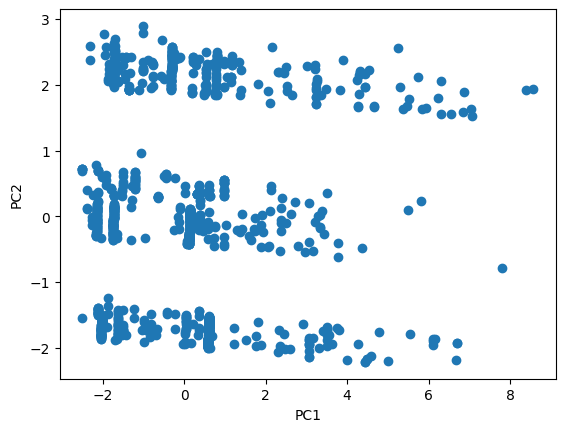

In [96]:
import matplotlib.pyplot as plt

plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [97]:
#t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

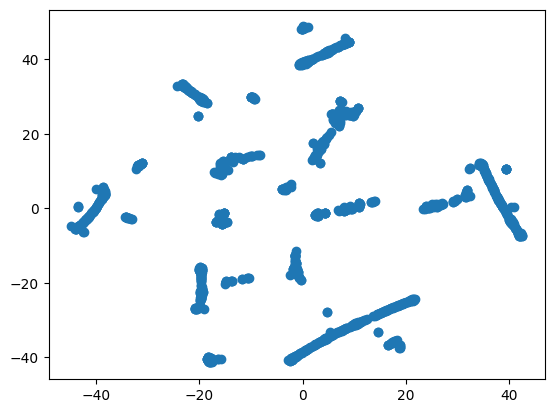

In [98]:
tsne_df = pd.DataFrame(tsne_result, columns=['Dim1','Dim2'])

plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'])
plt.show()
